In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


muestra = pd.read_csv('daq_log_ls.csv')



In [2]:
SAMPLES = 2000
adc_float = muestra[1:SAMPLES]['ADC'].apply(lambda x: float(x))
adc_convert = adc_float.divide(1024)
dac_float = muestra[1:SAMPLES]['DAC'].apply(lambda x: float(x))
dac_convert = dac_float.divide(1024)

/var/folders/54/qt4_3v213yz8f2l3r0swxkz80000gn/T/ipykernel_90901/239758144.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(adc_convert[1:SAMPLES], label='ADC')
/var/folders/54/qt4_3v213yz8f2l3r0swxkz80000gn/T/ipykernel_90901/239758144.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(dac_convert[1:SAMPLES], label='DAC')


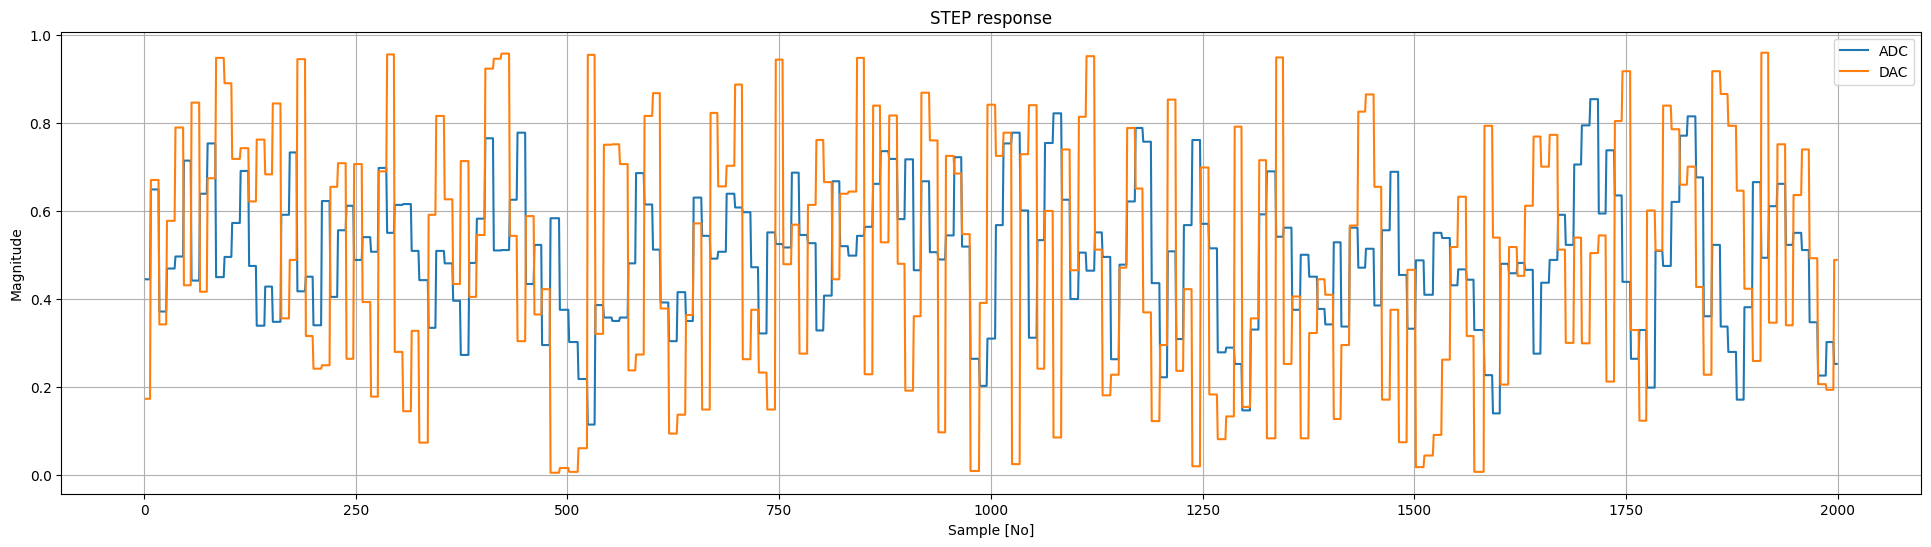

In [3]:

plt.figure(figsize=(24, 6))
plt.title('STEP response')
plt.plot(adc_convert[1:SAMPLES], label='ADC')
plt.plot(dac_convert[1:SAMPLES], label='DAC')
plt.ylabel('Magnitude')
plt.xlabel('Sample [No]')
plt.legend()
plt.grid()

An alisis: Utilizar una senal cuadrada de 10Hz como senal de referencia. Sin aplicar control, obtener
la respuesta al escal ́on del sistema a lazo abierto. Medir el tiempo de subida, tr, y mostrar los gr ́aficos
que se generan. El tiempo de subida se calcula como el tiempo que tarda la se ̃nal en ir del 10 % al
90 % de su valor (tr = t90 % − t10 %). Utilizar un osciloscopio o medir la salida del circuito con el
microcontrolador y pasarle los datos a la computadora.

In [ ]:
maximo = adc_convert.max()
adc_10 = maximo * 0.1
adc_90 = maximo * 0.9
sample_init = 400
sample_end = 560
print(adc_10)
print(adc_90)

t10_rs = (adc_convert[sample_init:sample_end]-adc_10).argmin()
print(t10_rs)

t90_rs = (adc_convert[sample_init:sample_end]-adc_90).argmax()
print(t90_rs)

plt.figure(figsize=(24, 6))
plt.title('rising')
plt.plot(adc_convert[(sample_init+t10_rs):(sample_init+t90_rs)], label='ADC')
plt.ylabel('Magnitude')
plt.xlabel('Sample [No]')
plt.legend()
plt.grid()